In [1]:
import yt
import astropy.units as u
%matplotlib inline 
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import h5py
from glob import glob

In [2]:
unit_base = {
    "length": (1.0, "pc"),
    "velocity": (100, "cm/s"),
    "mass": (1.0, "Msun"),
}
data = yt.load("../data/snapshot_296.hdf5", unit_base=unit_base)

yt : [INFO     ] 2024-04-22 17:26:01,742 ComovingIntegrationOn != 1 or (not found and OmegaLambda is 0.0), so we are turning off Cosmology.
yt : [INFO     ] 2024-04-22 17:26:01,768 Parameters: current_time              = 0.0002463474080710203
yt : [INFO     ] 2024-04-22 17:26:01,768 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-04-22 17:26:01,769 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-04-22 17:26:01,769 Parameters: domain_right_edge         = [8.16 8.16 8.16]
yt : [INFO     ] 2024-04-22 17:26:01,771 Parameters: cosmological_simulation   = 0


In [3]:
grad_fields = data.add_gradient_fields(("gas", "temperature"))

yt : [INFO     ] 2024-04-22 17:26:01,802 Allocating for 1.084e+07 particles
Loading particle index: 100%|█████████████████| 42/42 [00:00<00:00, 2653.50it/s]


In [4]:
grad_fields

[('gas', 'temperature_gradient_x'),
 ('gas', 'temperature_gradient_y'),
 ('gas', 'temperature_gradient_z'),
 ('gas', 'temperature_gradient_magnitude')]

In [5]:
#data.derived_field_list

yt : [INFO     ] 2024-04-22 17:26:02,875 xlim = 3.580000 4.580000
yt : [INFO     ] 2024-04-22 17:26:02,875 ylim = 3.580000 4.580000
yt : [INFO     ] 2024-04-22 17:26:02,876 xlim = 3.580000 4.580000
yt : [INFO     ] 2024-04-22 17:26:02,877 ylim = 3.580000 4.580000
yt : [INFO     ] 2024-04-22 17:26:02,878 Making a fixed resolution buffer of (('gas', 'vmag')) 800 by 800



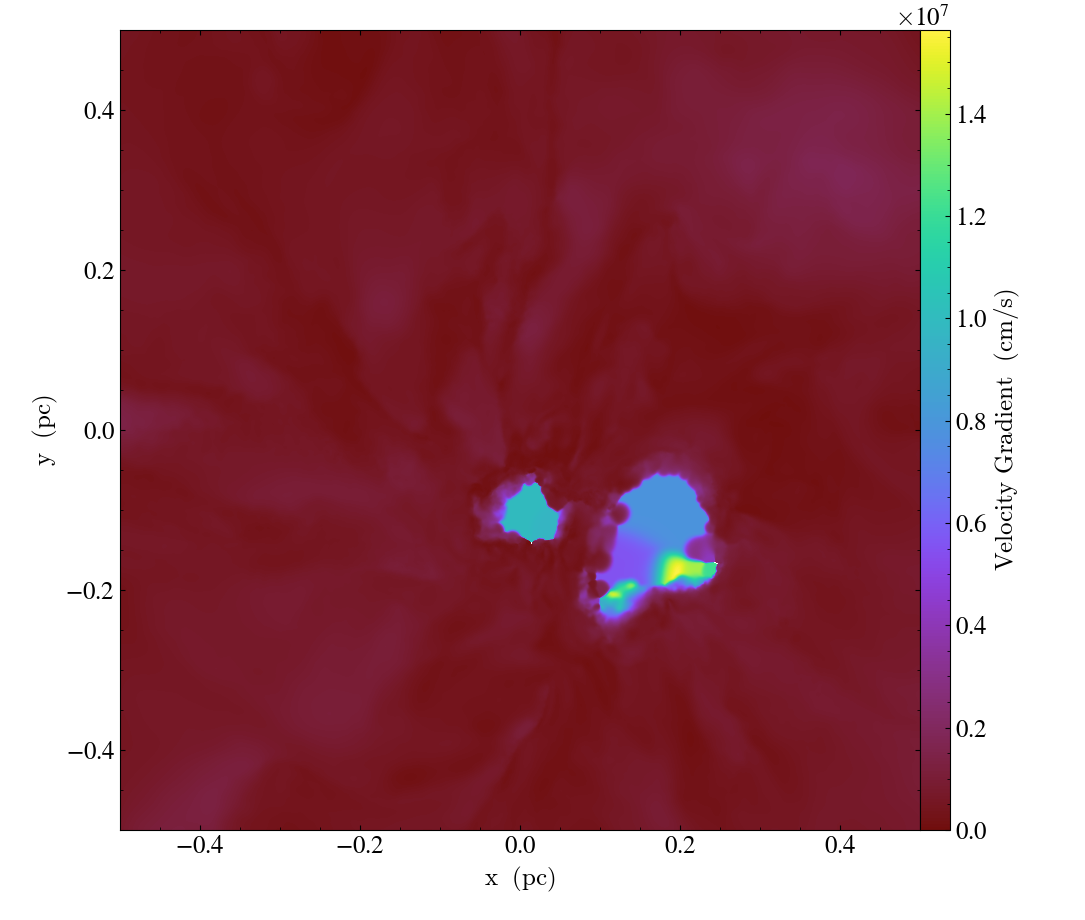

In [6]:
def v_mag(field, data):
    x = data[('gas','velocity_x')]
    y = data[('gas','velocity_y')]
    z = data[('gas','velocity_z')]
    vmag = np.sqrt((x)**2+(y)**2+(z)**2)
    
    return vmag


data.add_field(
    ('gas', 'vmag'),
    function=v_mag,
    units="cm/s",
    take_log=False,
    display_name="Velocity Gradient",
    sampling_type="particle",
    force_override=True
)


data.force_periodicity()

# Take a slice through the center of the domain
slc = yt.SlicePlot(data,'z', [('gas', 'vmag')], width=(1, "pc"))
#slc.set_zlim(("gas", "vmag"), 0, 4e6)
slc
